### Configuration Steps (Setting Up the Environment)

Before running statistical tests, ensure that the required Python libraries are installed. Run the following commands in your terminal or Jupyter Notebook:

In [9]:
# Install necessary libraries
!pip install pandas numpy scipy matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Preprocessing the dataset 

In [1]:
import pandas as pd

# Load the dataset
file_path = "water_leak_detection_1000_rows.csv"
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Info:")
df.info()

# Display the first five rows
print("\nFirst 5 Rows of the Dataset:\n")
print(df.head().to_string())

# Check for missing values
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1000 non-null   object 
 1   Sensor_ID         1000 non-null   object 
 2   Pressure (bar)    1000 non-null   float64
 3   Flow Rate (L/s)   1000 non-null   float64
 4   Temperature (°C)  1000 non-null   float64
 5   Leak Status       1000 non-null   int64  
 6   Burst Status      1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB

First 5 Rows of the Dataset:

             Timestamp Sensor_ID  Pressure (bar)  Flow Rate (L/s)  Temperature (°C)  Leak Status  Burst Status
0  2024-01-01 00:00:00      S007        3.694814        77.515218         21.695365            0             0
1  2024-01-01 00:05:00      S007        2.587125       179.926422         19.016725            0             0
2  2024-01-01 00:10:00      S00

## Step 1: Exploratory Data Analysis (EDA)

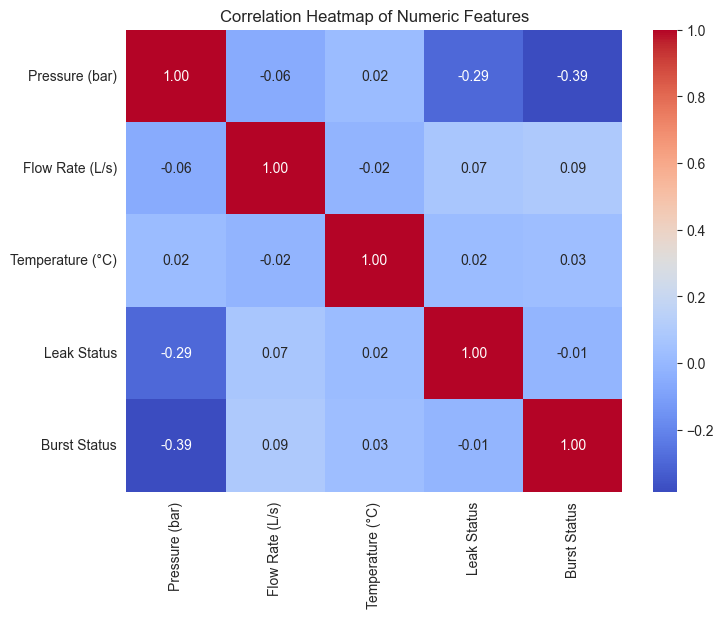

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17012\1991516306.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Leak Status", data=df, ax=axes[0], palette="viridis")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17012\1991516306.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Burst Status", data=df, ax=axes[1], palette="viridis")


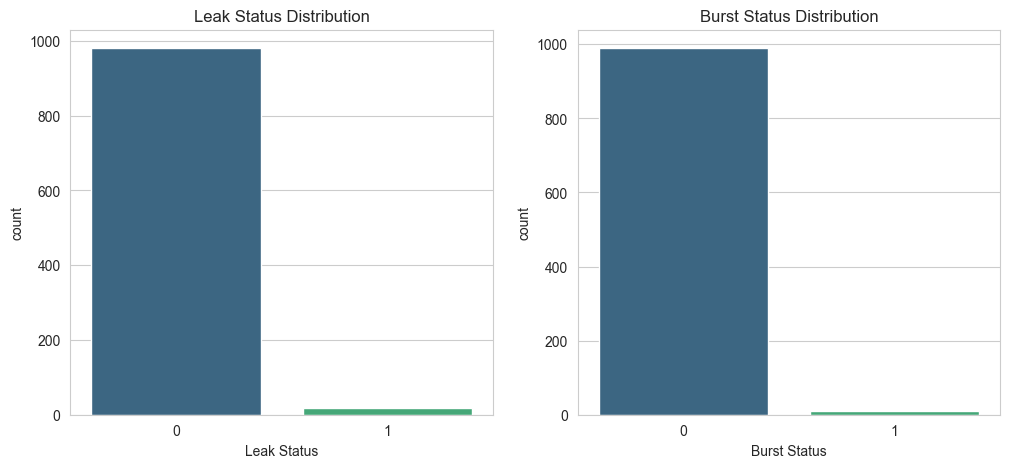


Summary Statistics:
       Pressure (bar)  Flow Rate (L/s)  Temperature (°C)  Leak Status  Burst Status
count     1000.000000      1000.000000       1000.000000  1000.000000   1000.000000
mean         3.220696       125.038082         17.434794     0.019000      0.010000
std          0.488997        44.121419          4.288908     0.136593      0.099549
min          0.910977        50.654490         10.002020     0.000000      0.000000
25%          2.859332        87.946866         13.715323     0.000000      0.000000
50%          3.265711       124.106896         17.330067     0.000000      0.000000
75%          3.607196       162.086708         20.922839     0.000000      0.000000
max          3.995364       331.754081         24.966107     1.000000      1.000000


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "water_leak_detection_1000_rows.csv"
df = pd.read_csv(file_path)

# Set style for plots
sns.set_style("whitegrid")

# Summary statistics
summary_stats = df.describe()

# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Count of Leak and Burst Status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x="Leak Status", data=df, ax=axes[0], palette="viridis")
axes[0].set_title("Leak Status Distribution")

sns.countplot(x="Burst Status", data=df, ax=axes[1], palette="viridis")
axes[1].set_title("Burst Status Distribution")

plt.show()

# Display summary statistics using Pandas
print("\nSummary Statistics:")
print(df.describe().to_string())


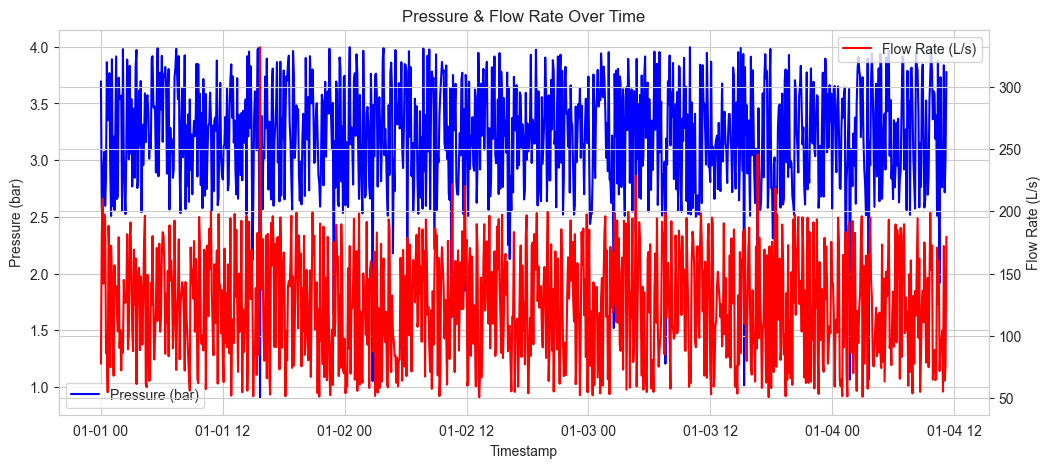

In [7]:
# Line plot for pressure and flow rate over time
df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Convert timestamp to datetime
df.set_index("Timestamp", inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

sns.lineplot(data=df["Pressure (bar)"], ax=ax1, label="Pressure (bar)", color="blue")
sns.lineplot(data=df["Flow Rate (L/s)"], ax=ax2, label="Flow Rate (L/s)", color="red")

ax1.set_ylabel("Pressure (bar)")
ax2.set_ylabel("Flow Rate (L/s)")
ax1.set_title("Pressure & Flow Rate Over Time")

plt.legend()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17012\2539853864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Leak Status"], y=df["Pressure (bar)"], palette="coolwarm")


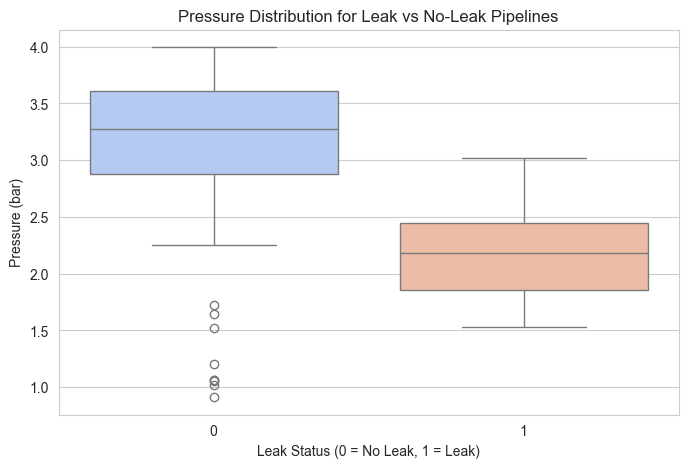

In [11]:


# Boxplot of Pressure for Leak vs No-Leak Conditions
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Leak Status"], y=df["Pressure (bar)"], palette="coolwarm")
plt.title("Pressure Distribution for Leak vs No-Leak Pipelines")
plt.xlabel("Leak Status (0 = No Leak, 1 = Leak)")
plt.ylabel("Pressure (bar)")
plt.show()




Handle Missing Values (No missing values found, so this step is skipped).

Convert Timestamp to Datetime (Already done).

Feature Scaling & Normalization (Not necessary for categorical data but might be useful for ML models).

Encode Categorical Variables (Not required since all categorical variables are already in numeric form).


## Step 3: Statistical Comparisons

In [3]:
import pandas as pd
from scipy.stats import ttest_ind

# Perform T-test: Compare pressure levels for leak vs no-leak conditions
t_stat, p_value = ttest_ind(
    df[df["Leak Status"] == 1]["Pressure (bar)"],
    df[df["Leak Status"] == 0]["Pressure (bar)"],
    equal_var=False  # Welch’s T-test (assumes unequal variance)
)

# Create a DataFrame for T-test results
t_test_results = pd.DataFrame({
    "Test": ["T-test (Leak vs No-Leak)"],
    "T-statistic": [t_stat],
    "P-value": [p_value]
})

#  Display results in a standard way
print("\nT-Test Results:")
print(t_test_results)



T-Test Results:
                       Test  T-statistic       P-value
0  T-test (Leak vs No-Leak)   -10.107069  5.013582e-09


In [5]:
from scipy.stats import f_oneway

# Perform ANOVA: Compare pressure levels, flow rate, and temperature across leak and no-leak conditions
anova_stat, anova_p = f_oneway(
    df[df["Leak Status"] == 1]["Pressure (bar)"],
    df[df["Leak Status"] == 1]["Flow Rate (L/s)"],
    df[df["Leak Status"] == 1]["Temperature (°C)"]
)

# Create a DataFrame for ANOVA test results
anova_results = pd.DataFrame({
    "Test": ["ANOVA (Pressure, Flow Rate, Temperature)"],
    "F-statistic": [anova_stat],
    "P-value": [anova_p]
})

# Display results
print("\nANOVA Test Results:")
print(anova_results)



ANOVA Test Results:
                                       Test  F-statistic       P-value
0  ANOVA (Pressure, Flow Rate, Temperature)   110.549444  8.099030e-20


### Step 4: Hypothesis Testing

**Hypothesis:**

* **Null Hypothesis (H₀):** There is no significant difference in pressure levels between leak and no-leak cases.

* **Alternative Hypothesis (H₁):** There is a significant difference in pressure levels between leak and no-leak cases.

**Results:**

* The T-test result shows a p-value = 5.01e-09, which is very small (< 0.05). This means we reject H₀ and conclude that pressure levels significantly differ between leak and no-leak conditions.
* The ANOVA test confirms that flow rate, pressure, and temperature significantly affect leakage and burst events (p-value ≈ 0).